# 1 전국 도시 공원 표준 데이터

https://www.data.go.kr/dataset/15012890/standard.do

    * 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
    * 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
    * 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
    * 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
    * 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

### 1.1 이번 챕터에서 필요한 것들

#### 1.1.1 Pandas Profiling

    * pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects

    * 아나콘다로 주피터를 설치했다면 : conda install -c conda-forge pandas-profiling

    * pip로 주피터를 설치했다면 : pip install pandas-profiling

#### 1.1.2 워드클라우드

amueller/word_cloud: A little word cloud generator in Python

    * 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

    * conda : conda install -c conda-forge wordcloud

    * pip : pip install wordcloud

### 1.2 분석에 사용할 도구를 불러와보자

In [1]:
# 필요한 라이브러리를 로드해준다
# pandas, numpy, seaborn, matplotlib

import pandas as pd  # 데이터 분석 라이브러리
import numpy as np    # 수치계산 라이브러리 (평균, 로그, 루트 계산 등)
import seaborn as sns   # 시각화 라이브러리 (통계적인 기능을 내장)
import matplotlib.pyplot as plt   # 

%matplotlib inline # 구버전 주피터 사용하고 있는 사람들 / 이거 설정해줘야 그래프 표시됨

UsageError: unrecognized arguments: # 구버전 주피터 사용하고 있는 사람들 / 이거 설정해줘야 그래프 표시됨


### 1.3 Seaborn 설정으로 시각화의 스타일, 폰트 설정

In [ ]:
# seaborn의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 해준다
# plt.rc("font", family="Malgun Gothic")
sns.set(font = "Malgun Gothic",             # 폰트 설정
       rc={"axes.unicode_minus": False},    # 마이너스 폰트 깨지는 현상 해결
       style = 'darkgrid')                  # 화면 배경

<AxesSubplot:title={'center':'한글폰트'}>

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-pack

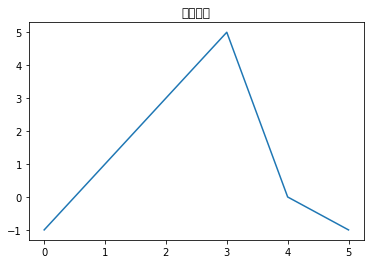

In [2]:
# 한글폰트 설정 확인
pd.Series([-1, 1, 3, 5, 0, -1]).plot(title = "한글폰트")

In [3]:
# 더 선명하게
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

### 1.4 데이터 로드

In [4]:
# 데이터 로드해서 df 라는 변수에 담아준다

df = pd.read_csv("data/전국도시공원표준데이터.csv", encoding = "cp949")
df.shape

(18137, 20)

In [5]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


### 1.5 Pandas Profiling

In [6]:
# 버전 체크
# import pandas_profiling

# pandas_profiling.__version__

미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [7]:
# pandas_profiling 의 profileReport 를 불러와 표현
# 이 때 title은 "도시공원 표준 데이터"로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일을 생성해서 그려보자

# from pandas_profiling import ProfileReport

# %time profile = ProfileReport(df, title="도시공원 표준 데이터")
# profile.to_file(output_file="05-park_pandas_profile.html")

### 1.6 기본 정보 보기

In [8]:
#info로 기본정보 봐보자 -

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [9]:
# 결측치의 수 세보자
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [10]:
# 결측치 비율 구하기
# 100을 곱해주면 퍼센티지를 알 수 있음
df.isnull().mean() * 100
round(df.isnull().mean() * 100, 2)

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

### 1.7 결측치 시각화

* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)


In [11]:
sns.set(font = "Malgun Gothic",             # 폰트 설정
       rc={"axes.unicode_minus": False},    # 마이너스 폰트 깨지는 현상 해결
       style = 'darkgrid')                  # 화면 배경

<AxesSubplot:>

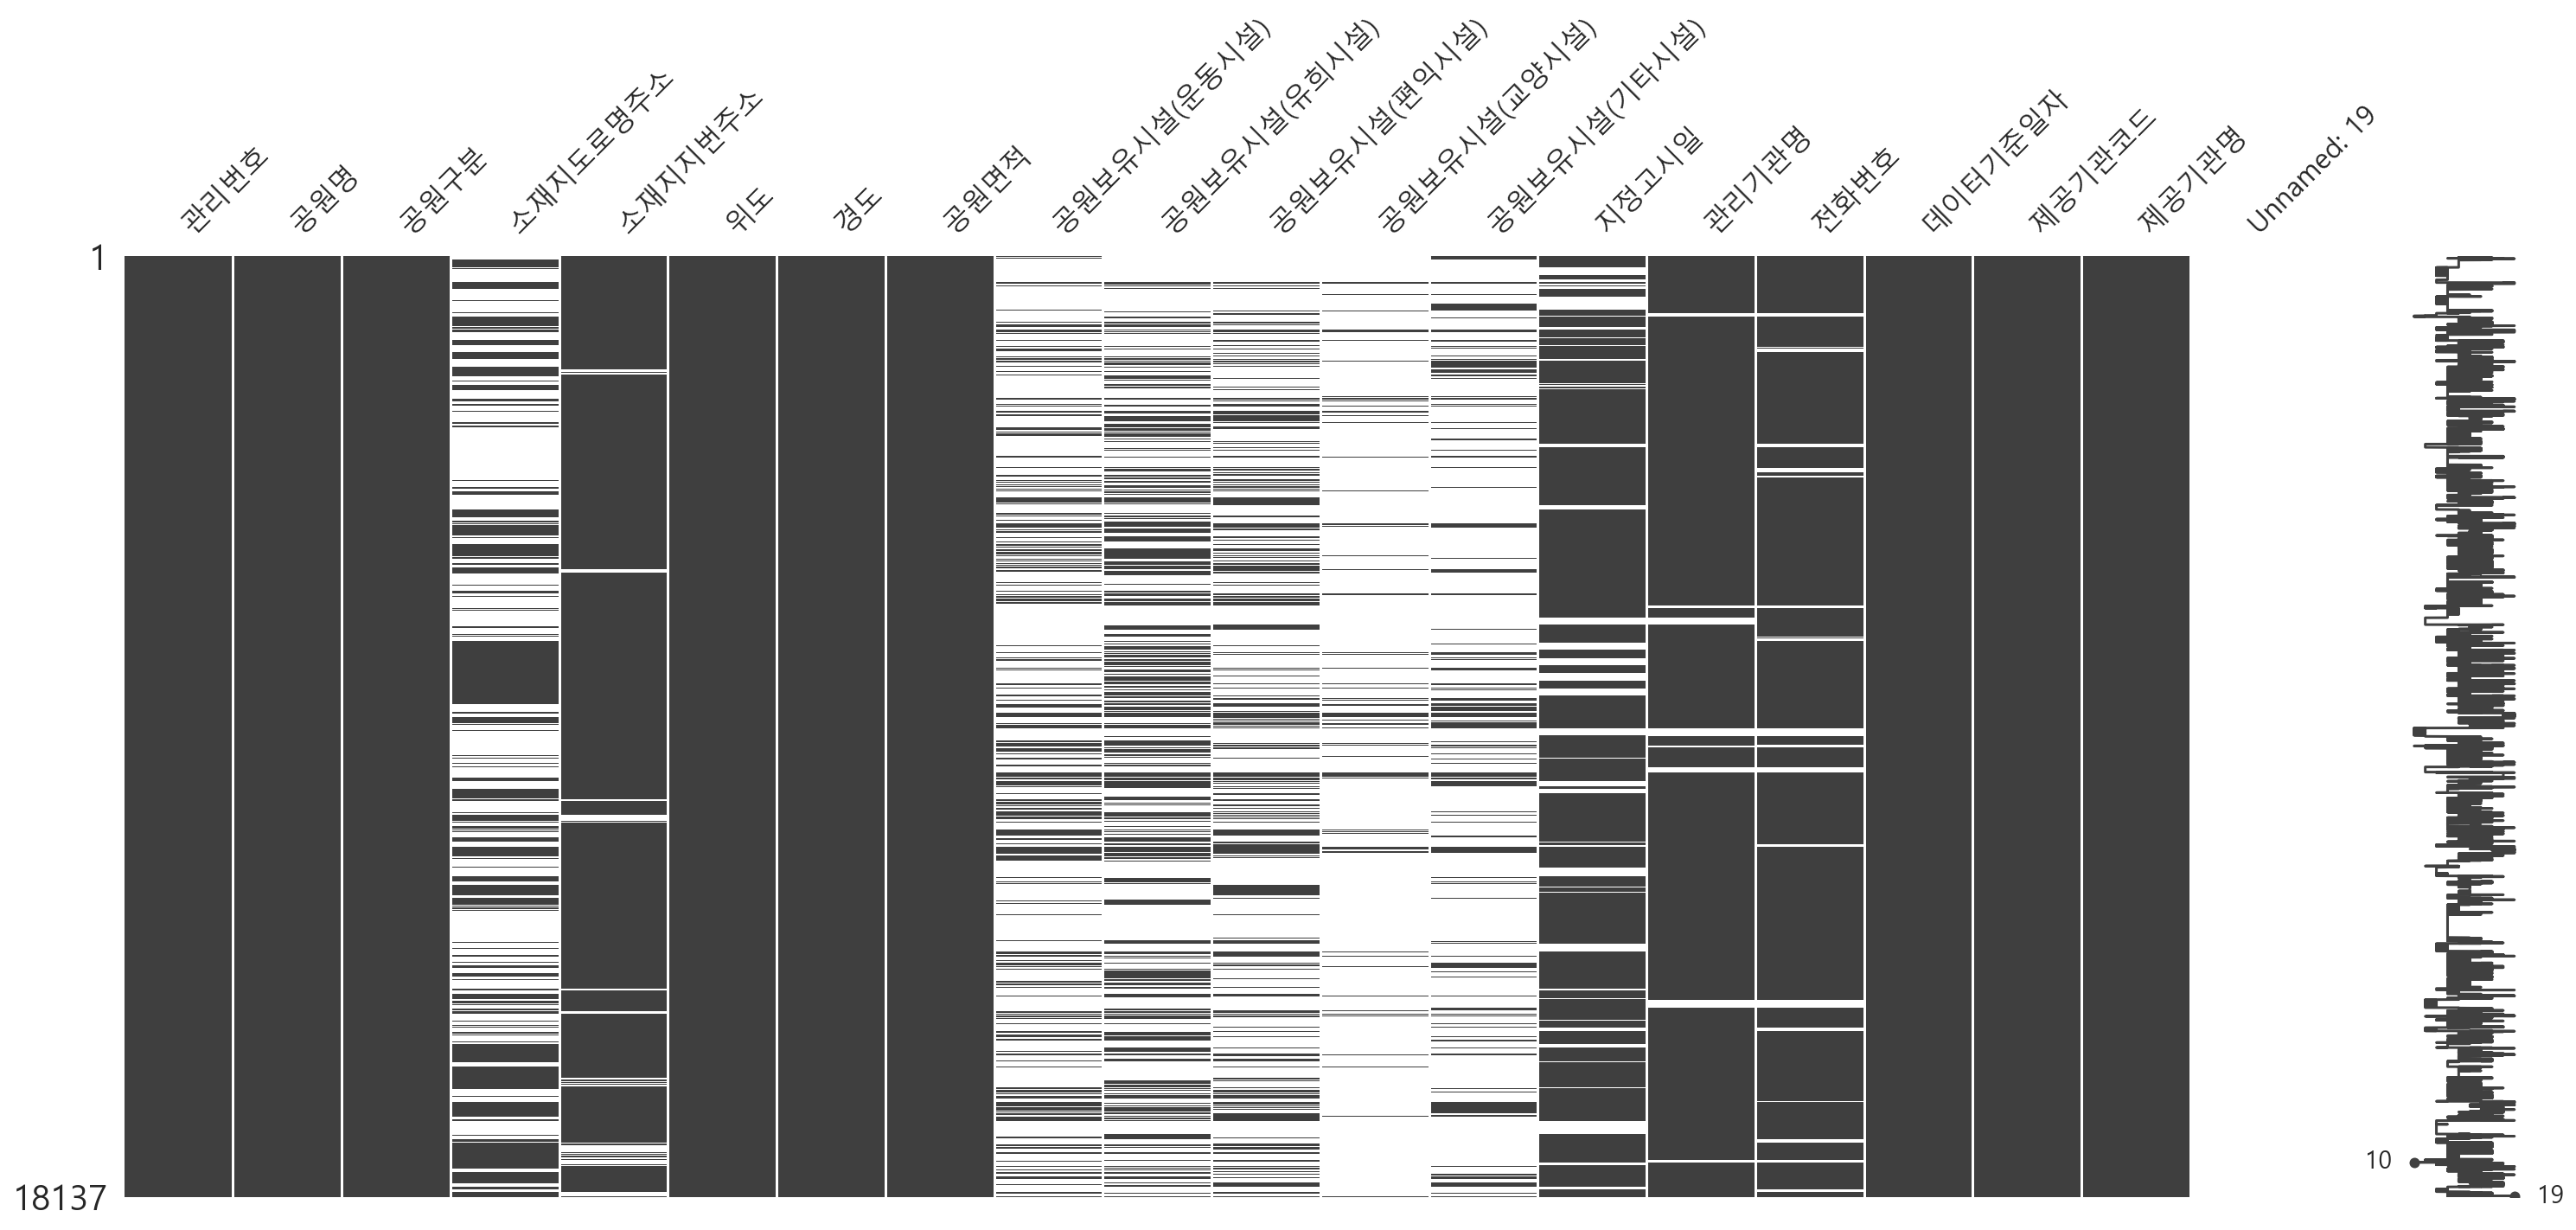

In [12]:
import missingno

missingno.matrix(df)

<AxesSubplot:>

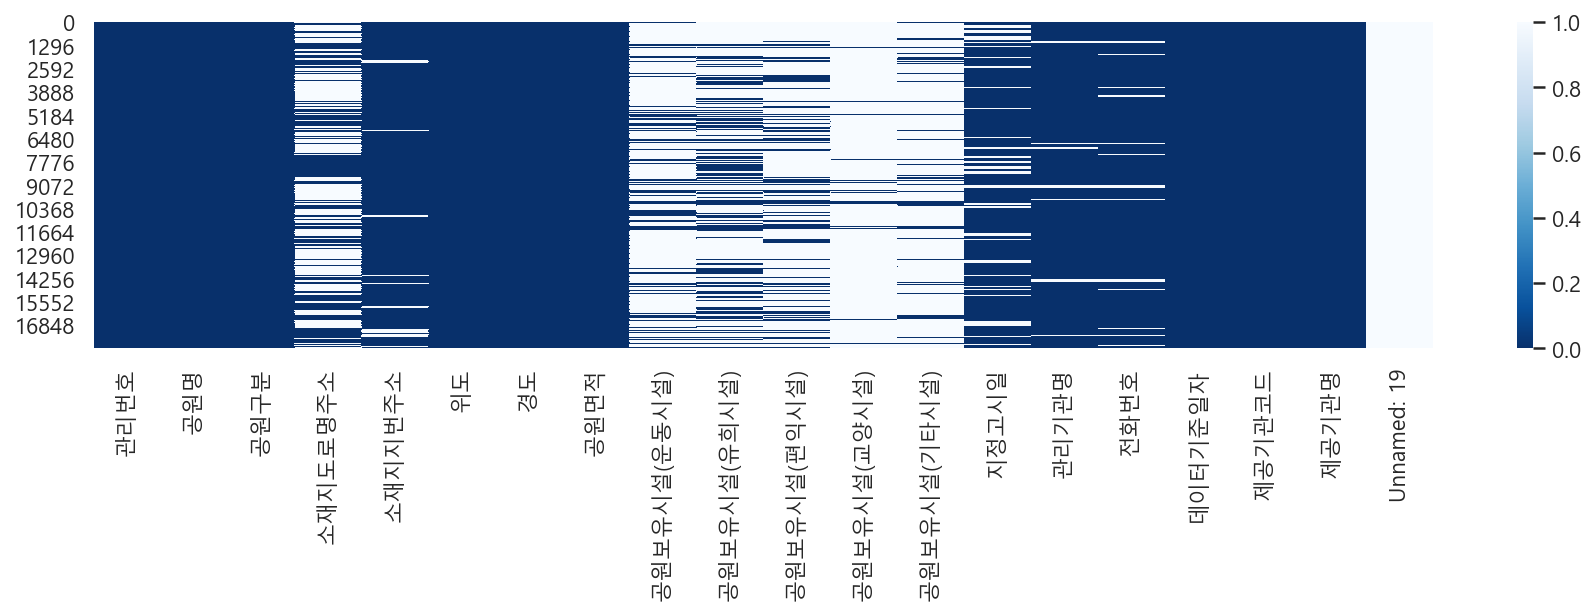

In [13]:
# seaborn 을 통해 위와 같은 결측치 그래프를 그려보자

null = df.isnull()

plt.figure(figsize=(15, 3))
sns.heatmap(null, cmap="Blues_r")

# 2 데이터 전처리

### 2.1 불필요한 컬럼 제거하기

In [14]:
# 전체 컬럼명 출력
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [15]:
# drop으로 'Unnamed: 19'를 제거하기

# axis = 1 컬럼 기준
# axis = 0 행 기준
df = df.drop(["Unnamed: 19"], axis=1)
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구


### 2.2 결측치 대체

    * 둘 중 하나만 있을 때 나머지 데이터로 결측치 대체하기

#### 2.2.1 도로명 주소와 지번 주소

In [16]:
# 도로명 주소의 널값 수

df["소재지도로명주소"].isnull().sum()

10098

In [17]:
# 지번 주소의 널값 수
df["소재지지번주소"].isnull().sum()

979

In [18]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치가 아닌 데이터를 찾아보자

df[df["소재지도로명주소"].notnull() & df["소재지지번주소"].notnull()].shape

(7060, 19)

In [19]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채워준다

df["소재지도로명주소"] = df["소재지도로명주소"].fillna(df["소재지지번주소"])
df["소재지도로명주소"].isnull().sum()

0

In [20]:
# "소재지도로명주소"의 결측치수를 세어보자

df[df["소재지도로명주소"].isnull() & df["소재지지번주소"].isnull()].shape

(0, 19)

### 2.3 파생변수 만들기

#### 2.3.1 주소를 통한 시도, 구군 변수 생성

In [21]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# .str.split(' ', expand=True)[0] 을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기
# split 하게되면 공백을 기준으로 값이 나뉘게됨
# expand=True 하게되면 첫번째 값을 가져오게됨 ex) 부산광역시
df["시도"] = df["소재지도로명주소"].str.split(expand=True)[0]
df[["소재지도로명주소", "시도"]].head(3)

,소재지도로명주소,시도
0,부산광역시 강서구 구랑동 1199-7,부산광역시
1,부산광역시 강서구 구랑동 1219,부산광역시
2,부산광역시 강서구 대저1동 1330-7,부산광역시


In [22]:
# 구군 가져오기
df["구군"] = df["소재지도로명주소"].str.split(expand=True)[1]
df[["소재지도로명주소", "시도", "구군"]].sample(3)

,소재지도로명주소,시도,구군
8086,경상남도 창원시 진해구 용원동 1353-5,경상남도,창원시
9137,경상북도 구미시 상모동 269 일원,경상북도,구미시
630,전라남도 담양군 담양읍 향교리 산62,전라남도,담양군


In [23]:
# 시도 데이터의 빈도수 세어보기
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [24]:
# 강원 을 강원도로 바꿔주자
df["시도"] = df["시도"].replace("강원", "강원도")
df["시도"].shape

(18137,)

# 2.4 이상치 제거
    * 경도, 위도의 이상치 처리하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

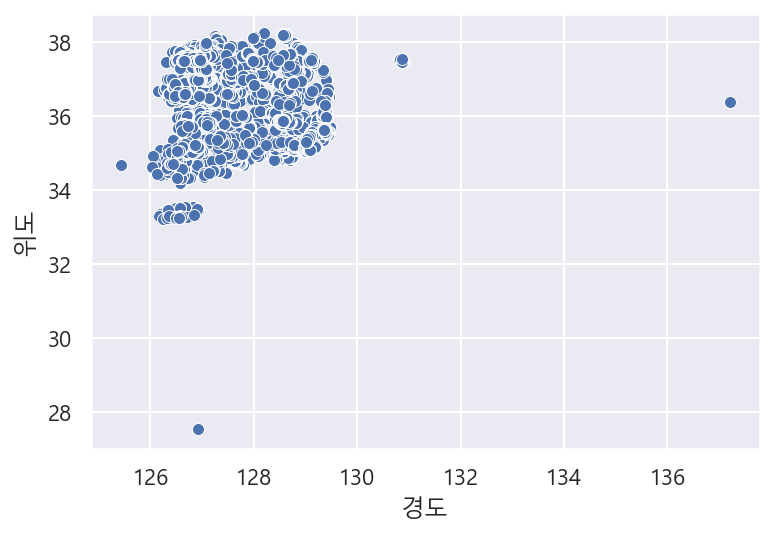

In [25]:
# 위경도 시각화
sns.scatterplot(data=df, x="경도", y="위도")

In [26]:
df[["위도", "경도"]].describe()

,위도,경도
count,18137.000000,18137.000000
mean,36.335922,127.543937
std,1.051835,0.892670
min,27.551606,125.430955
25%,35.275430,126.872301
50%,36.364729,127.130926
75%,37.404278,128.466193
max,38.224926,137.202661


In [27]:
# 이상치를 제거한 데이터를 df_park 라는 새로운 변수에 담아준다
df_park = df[(df["경도"] < 132) & (df["위도"] > 32)].copy()

<AxesSubplot:xlabel='경도', ylabel='위도'>

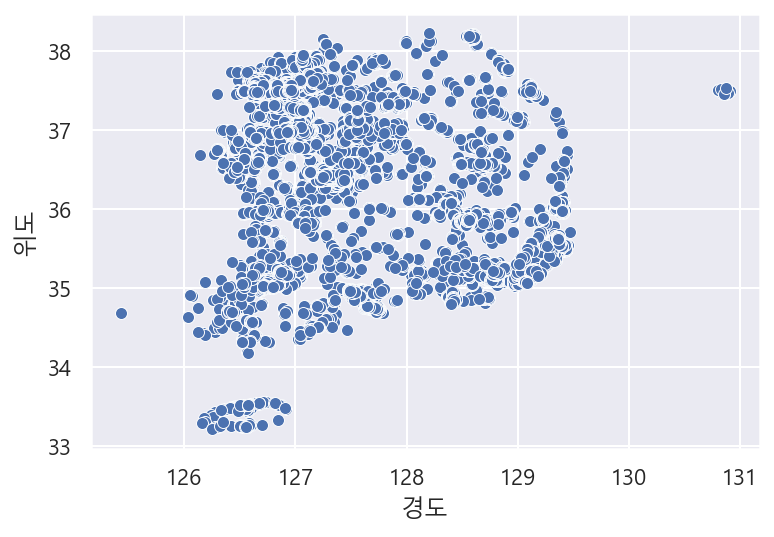

In [28]:
# 위도 경도의 아웃라이어 데이터가 제거되었는지 확인
sns.scatterplot(data=df_park, x="경도", y = "위도")

# 2.5 날짜 데이터 다루기

In [29]:
# 지정고시일의 데이터 타입을 본다
df["지정고시일"].head(1)

0    2011-09-02
Name: 지정고시일, dtype: object

In [30]:
# 지정고시일의 데이터 타입을 datatime 형태로 변경

df["지정고시일"] = pd.to_datetime(df["지정고시일"])
df["지정고시일"]

0       2011-09-02
1       2008-02-28
2       2013-01-23
3       1998-07-25
4       1995-04-07
           ...    
18132   1998-07-20
18133   1973-03-02
18134   1977-06-29
18135   1978-02-14
18136   2009-11-19
Name: 지정고시일, Length: 18137, dtype: datetime64[ns]

In [31]:
# 고시연도와 고시일을 지정고시일에서 추출해서 파생변수를 만들어준다

df["고시연도"] = df["지정고시일"].dt.year
df["고시월"] = df["지정고시일"].dt.month

df[["지정고시일", "고시연도", "고시월"]].head()

,지정고시일,고시연도,고시월
0,2011-09-02,2011.0,9.0
1,2008-02-28,2008.0,2.0
2,2013-01-23,2013.0,1.0
3,1998-07-25,1998.0,7.0
4,1995-04-07,1995.0,4.0


In [32]:
# 화랑공원의 고시연도를 찾아보자. 데이터 전처리가 맞게 되었는지 확인
df.loc[df["공원명"].str.contains("화랑"), ["공원명", "고시연도"]]

,공원명,고시연도
3077,판교제8호(화랑)공원,2004.0
4310,화랑공원,2010.0
7316,화랑공원,1972.0
10490,화랑,2004.0
10763,화랑공원,1980.0
15066,화랑,1991.0


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='고시연도', ylabel='Density'>

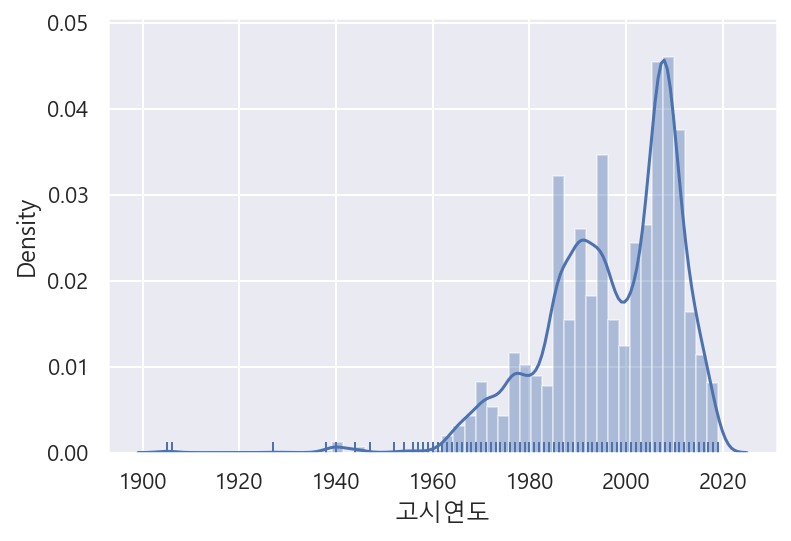

In [33]:
# 고시연도의 분포를 distplot으로 그려준다
# 이 때, 결측치가 있으면 오류가 나기 때문에 결측치가 없는 데이터만 따로 모아 그린다

# sns.distplot(df["고시연도"])
# sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"])
sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"], rug = True)

In [34]:
# 연도와 월별 고시 현황을 pivot_table로 그려보자
# year_month 라는 변수에 담아 재사용
# 데이터가 많기 때문에 2000년 보다 크고 2019년보다 작은 연도의 데이터만 본다
year_month = pd.pivot_table(df, index="고시연도", columns="고시월", values="공원명", aggfunc="count")
year_month = year_month[(year_month.index > 2000) & (year_month.index < 2019)]
year_month.style.background_gradient()

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,48.000000,12.000000,7.000000,42.000000,21.000000,16.000000,6.000000,16.000000,30.000000,36.000000,37.000000,40.000000
2002.0,38.000000,19.000000,18.000000,10.000000,18.000000,14.000000,49.000000,17.000000,7.000000,7.000000,59.000000,55.000000
2003.0,21.000000,13.000000,17.000000,19.000000,10.000000,23.000000,4.000000,8.000000,7.000000,18.000000,48.000000,38.000000
2004.0,48.000000,18.000000,16.000000,18.000000,13.000000,24.000000,7.000000,48.000000,10.000000,24.000000,59.000000,135.000000
2005.0,55.000000,32.000000,18.000000,23.000000,43.000000,33.000000,16.000000,62.000000,18.000000,34.000000,60.000000,105.000000
2006.0,84.000000,34.000000,69.000000,31.000000,54.000000,32.000000,18.000000,33.000000,24.000000,36.000000,119.000000,120.000000
2007.0,69.000000,12.000000,9.000000,42.000000,16.000000,46.000000,62.000000,66.000000,84.000000,164.000000,245.000000,106.000000
2008.0,163.000000,45.000000,77.000000,42.000000,30.000000,102.000000,15.000000,61.000000,32.000000,20.000000,24.000000,126.000000
2009.0,59.000000,31.000000,162.000000,135.000000,57.000000,60.000000,36.000000,23.000000,96.000000,27.000000,73.000000,100.000000


# 2.6 텍스트 데이터 다루기

### 2.6.1 정규표현식

#### 텍스트 데이터 다루기
#### 정규표현식 

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |	
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [35]:
# 정규표현식 라이브러리를 로드
# 설치가 필요 없이 파이썬에 내장되어 있느 라이브러리다
# 파이썬에 배터 포함됨 이라는 특징이 있는데 이런 여러 표준 라이브러리가 잘 갖춰져 있다

import re

### 2.6.2 공원 보유시설

In [36]:
# 컬럼이 너무 많으면 끝까지 보이지 않는다
# options.display 를 사용해 max_columns 값을 채워준다

pd.options.display.max_columns = 100

In [37]:
# 데이터 미리보기
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2008.0,2.0
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2013.0,1.0
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,1998.0,7.0
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,1995.0,4.0


### 2.6.3 운동시설

In [38]:
df["공원보유시설(운동시설)"].value_counts(sort=False).head(5)

# 제대로 안세어짐

허리돌리기, 롤링웨이스트 등      1
공중가로젓기, 달리기, 역기밀기    1
운동기구9                5
농구대1                 1
족구장+배드민턴장+게이트볼장      1
Name: 공원보유시설(운동시설), dtype: int64

In [39]:
# "공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만들어준다
# 그리고 다시 str 형태로 변경하고 gym 이라는 변수에 담아준다

gym = df["공원보유시설(운동시설)"].unique().tolist()
gym = str(gym)
gym[:1000]

"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3', '스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1', '하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1', '윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,옆파도타기1', '크로스워킹+스카이워킹1,파워프레스+풀웨이트1,싸이클론+트위스트1,스탠드업+마사지롤1,사이드스윙+터닝암1,푸시웨이트+레그프레스1', '평행봉1', '트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1', '크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1', '크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1', '족구장1,역기1', '등지압기1,마라톤운동+공중걷기운동1,허리돌리기+온몸돌리기1, 온몸역기올리기+온몸근육풀기1', '트리플트위스트1,트윈바디싣업1,크로스컨

In [40]:
# replace 기능을 사용해서 ,를 빈문자로 공백을 ,로 +를 ,로 변경해준다

gym = gym.replace("+", ",").replace("'", ",").replace(" ", ",").replace("/", ",")
gym[:1000]

'[,4,,,,7,,,nan,,,8,,,,5,,,,6,,,,3,,,,10,,,,14,,,,9,,,,30,,,,2,,,,13,,,,12,,,,40,,,,17,,,,-,,,,농구장,,,,궁도장,,,,풋살구장,,,,풋살구장,,농구장,,인라인스케이트장,,,,축구장,,,,족구장,,,,게이트볼장,,,,운동기구14개,,농구장2개소,,족구장1개소,,,,운동기구6개,,족구장1개소,,,,운동기구10개,,,,운동기구4개,,,,운동기구7개,,,,에어로빅장,,농구장,,,,테니스장,,씨름장,,농구장,,,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,,,철봉1,,,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,,,스트레칭롤러1,풀웨이트1,바웨이트1,,,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,,,평행봉1,,,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,,,족구장1,역기1,,,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,,,트리플트위스트1,트윈바디싣업1,크로스컨

In [41]:
# 제거할 특수문자를 빈문자로 대체합니다.
# re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
# 정규표현식에서 +, *, . 등은 특별한 의미를 갖습니다. 
# 이런 문자를 제거할 때는 \를 통해 예외처리를 합니다. 
# 예를들어 .이라면 \. 으로 사용합니다.
# 여기에서는 숫자와 .을 제거하도록 합니다.

gym = re.sub("[\d\/\-nan]", "", gym)
gym = re.sub(",{2,}", ",", gym)
gym[:1000]

'[,농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소.,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,

In [42]:
# split을 사용해 문자열을 ,로 리스트형태로 만든 후에 
# 판다스의 시리즈 형태로 데이터를 만들면 빈도수를 구할 수 있습니다.
# 빈도수는 gym_count 라는 변수에 담습니다.

gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장     221
농구장       216
운동기구      185
게이트볼장     156
체력단련시설    148
dtype: int64

<AxesSubplot:>

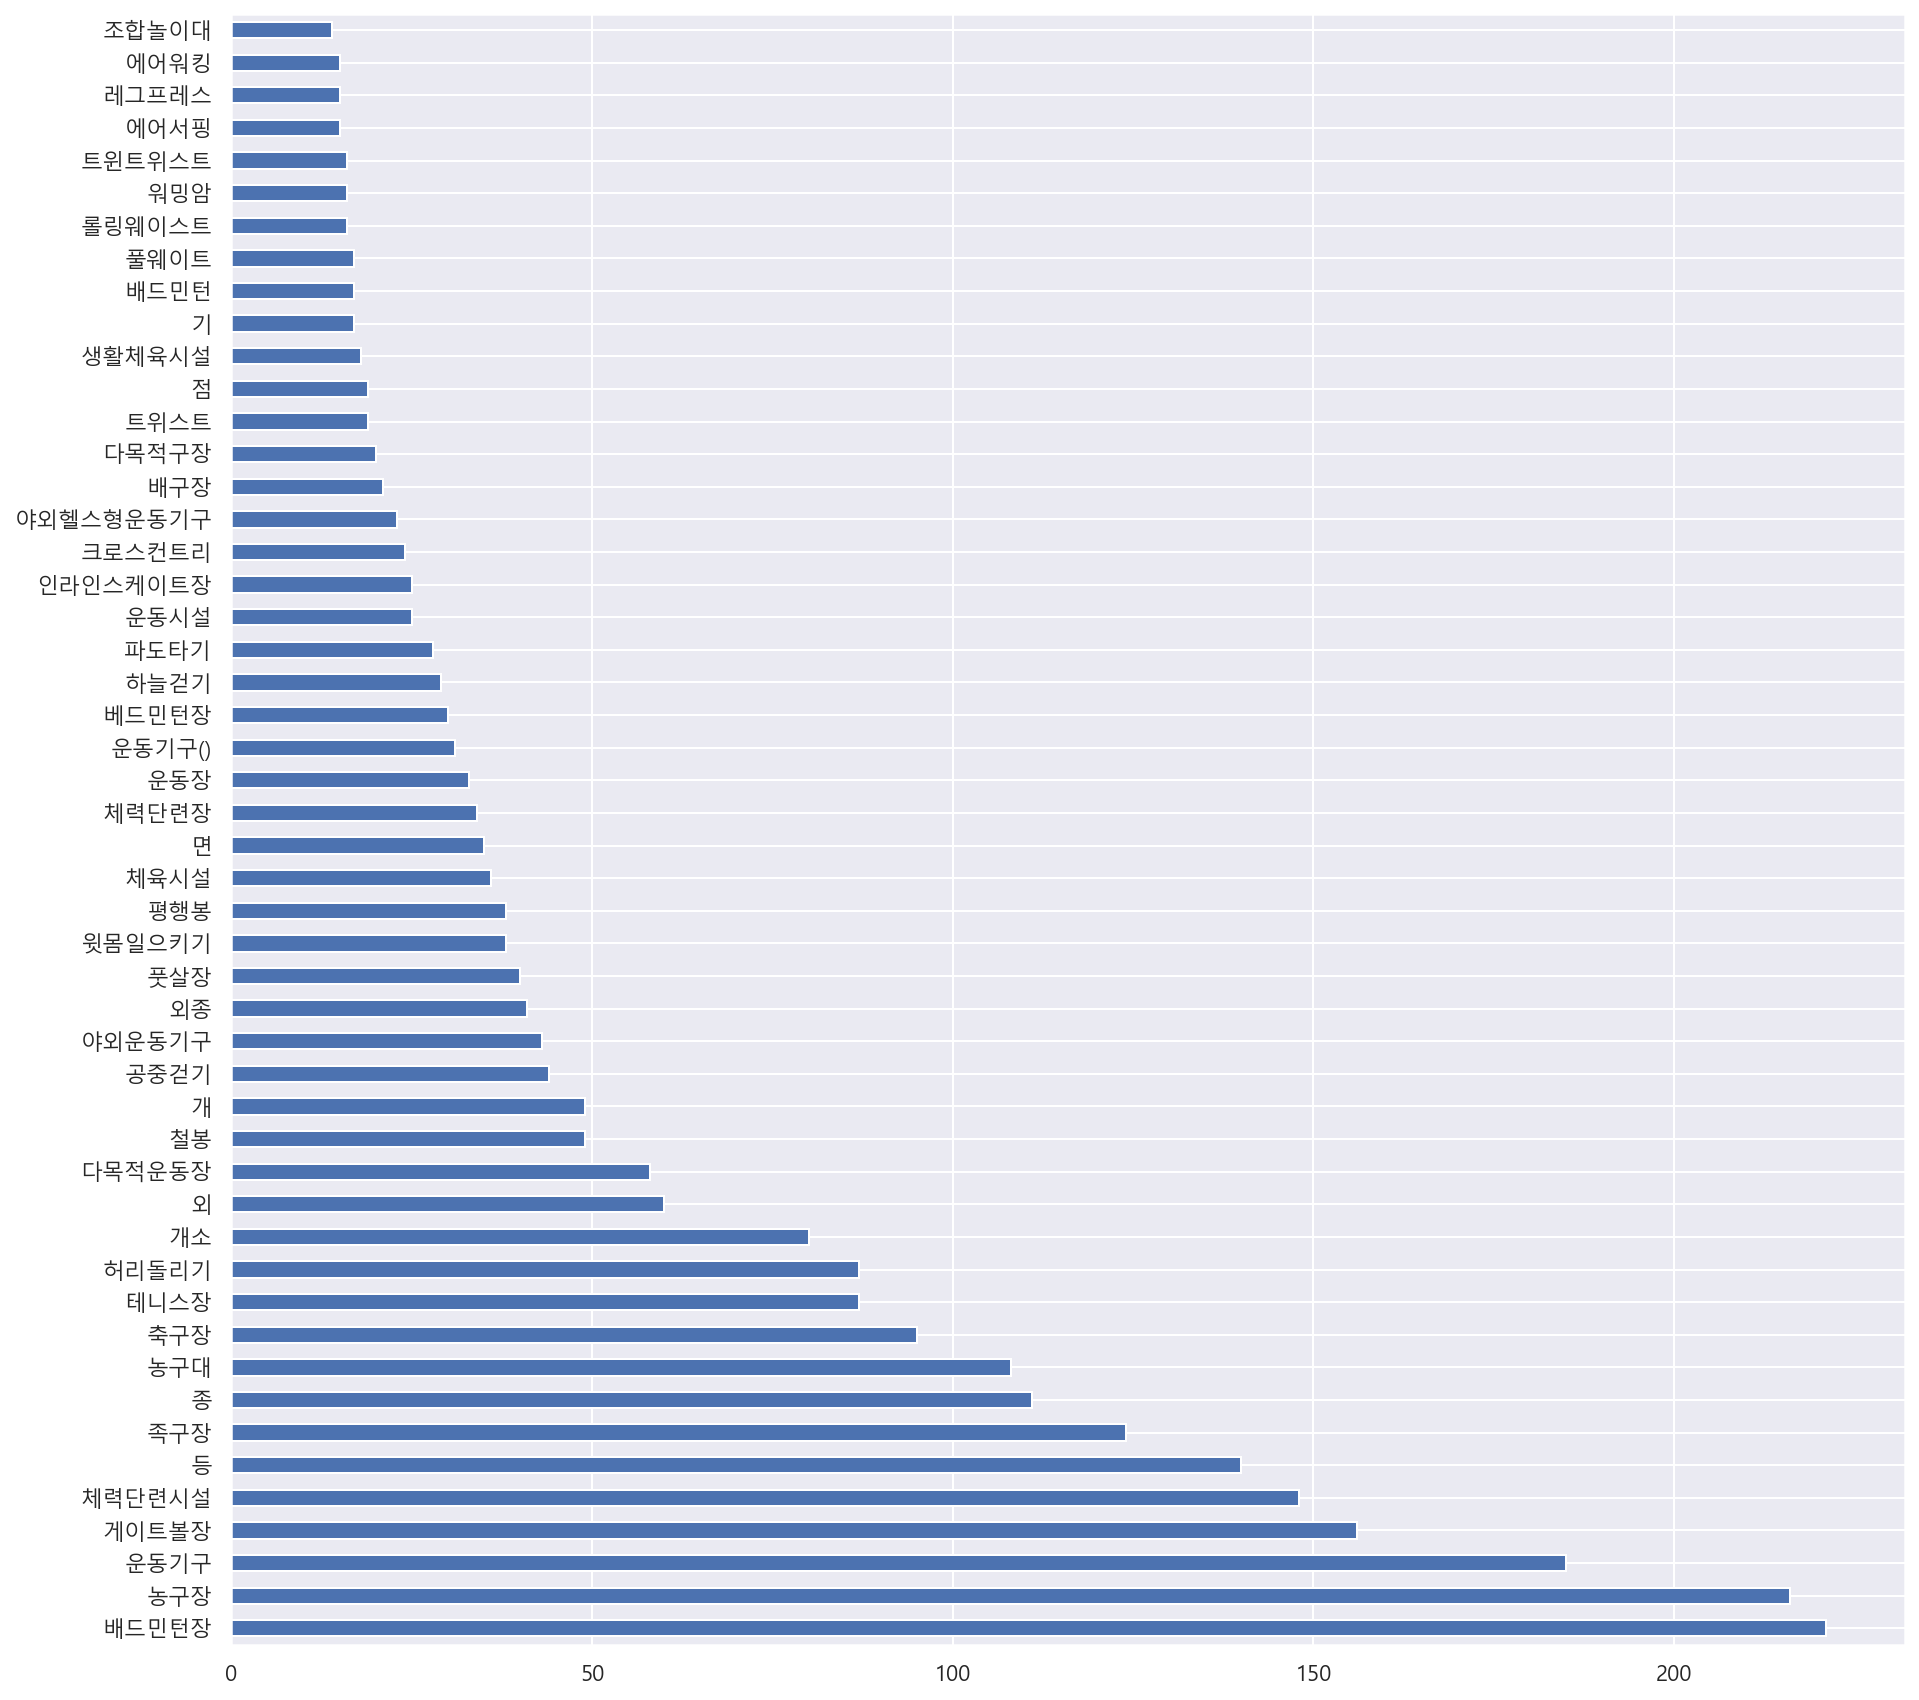

In [43]:
# 빈도수를 구한 gym_count 변수에서 head를 통해 상위 50개 단어에 대한 그래프를 그려준다
gym_count.head(50).plot.barh(figsize=(15, 15))

### 2.6.4 워드클라우드로 빈도수 표현하기
    amueller/word_cloud: A little word cloud generator in Python

    * 별도의 설치가 필요합니다.

    * 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

    * conda 사용시 : conda install -c conda-forge wordcloud

    * pip 사용시 : pip install wordcloud

In [44]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

def wordcloud(data, width=1200, height=500):

    word_draw = WordCloud(
        font_path = r"C:\Windows\Fonts\malgun.ttf",
        width=width, height=height,
        stopwords=["운동기구", "개소", "외종"],
        background_color = "white",
        random_state = 42                   # 설정해주게 되면 사용할때마다 변하지 않음
    )
    word_draw.generate(gym)

    plt.figure(figsize=(15, 5))   # 애를 설정해주지 않으면 사이즈가 변하지 않음. 따라서 그냥 아무거나 설정 해줘도 됨
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

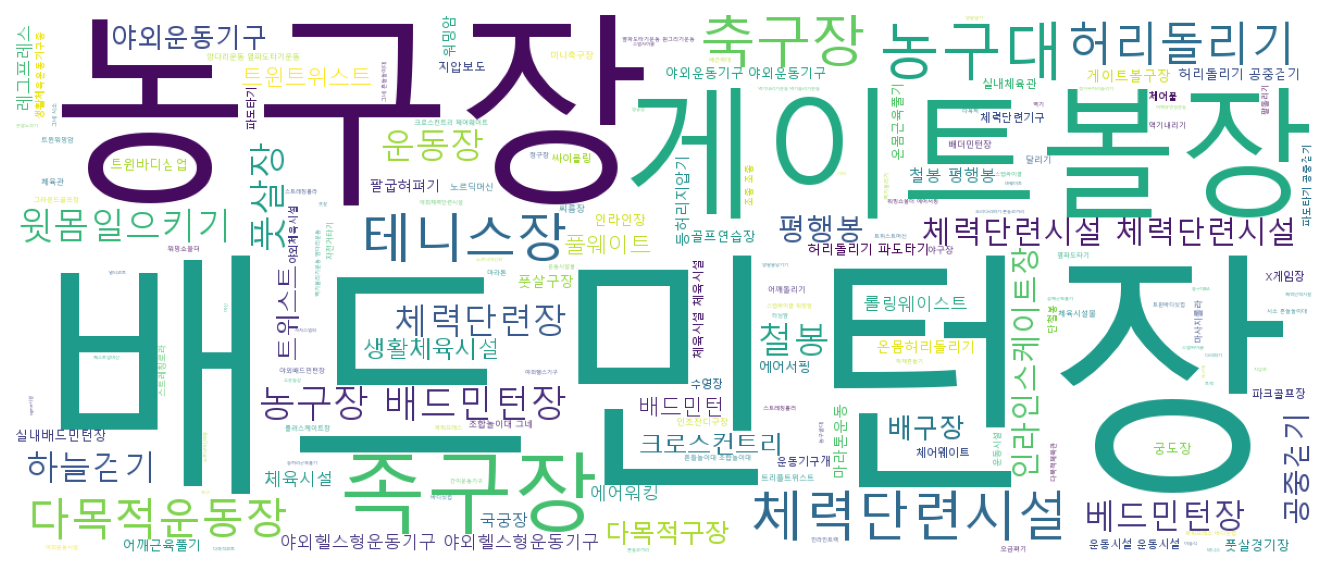

In [45]:
# 위에서 만든 함수에 전처리한 text인 gym을 넣어 그려보자
wordcloud(gym)

### 2.6.5 편익시설

In [46]:
# 편익시설에서 필요없는 문자를 제거하고
# 토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현
# 함수명은 get_string 으로 한다

# df.head()
# df["공원보유시설(편익시설)"].value_counts()

def get_string(text):
    if pd.isna(text):
        return text
    text = re.sub("[\d\.'\-(nan)\[\]/]", "", text)
    text = re.sub(" ", "", text)
    text = re.sub(",{2,}", ",", text)
    
    return text

In [47]:
# 함수가 잘 구현되었는지 확인해보자
# 다음의 문자를 전처리 했을 때
# "[1. '화장실' 5, 2. 주차장, -, nan]" 전처리 후 '화장실, 주차장,' 가 출력되는지 확인

get_string("[1. '화장실' 5, 2. 주차장, -, nan, /]")

'화장실,주차장,'

In [48]:
# 결측치를 넣어보자. 오류가 나지 않는지 확인
get_string(np.nan)

nan

In [49]:
# map을 통해 위에서 구현한 함수를 적용
# 원본과 비교해 보기 위해 "편익시설"이라는 새로운 컬럼을 만들어준다

df["편익시설"] = df["공원보유시설(편익시설)"].map(get_string)
df["편익시설"].head()

0    화장실
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [50]:
# 전처리 한 "편익시설"의 빈도수를 구하고
# tail 로 끝부분에 있는 데이터를 미리보기 한다

df["편익시설"].value_counts().tail()

정자,평벤치,음수대,화장실     1
화장실주차장주차장주차장주차장    1
파고라,원형벤치,앉음벽       1
화장실+음수대            1
주차장,식당휴게소          1
Name: 편익시설, dtype: int64

In [51]:
type(np.nan)

float

In [52]:
# 문자열을 연결해 주는 join으로 편익시설을 연결 해 주는 방법이 있다
# 이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류 발생
# 따라서 결측치를 제외한 값만 가져와서 연결해준다

fac = ",".join(df.loc[df["편익시설"].notnull(), "편익시설"])
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [53]:
# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str로 변환
# 위에서 만든 get_string 함수로 전처리해준다
fac = str(df["편익시설"].tolist())
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [54]:
# ,가 2개 이상 들어가면 하나로 변경
# '화장실, 주차장,,,' 텍스트를 정규표현식으로 바꿔본다

re.sub(",{2,}",",", '화장실,주차장,,,')

'화장실,주차장,'

In [55]:
# 다시 "," 로 텍스트를 분리하고 판다스의 Series 형태로 만들고 value_counts 로 빈도수를 계산

fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

화장실    1921
파고라     817
벤치      650
정자      535
주차장     502
dtype: int64

<AxesSubplot:>

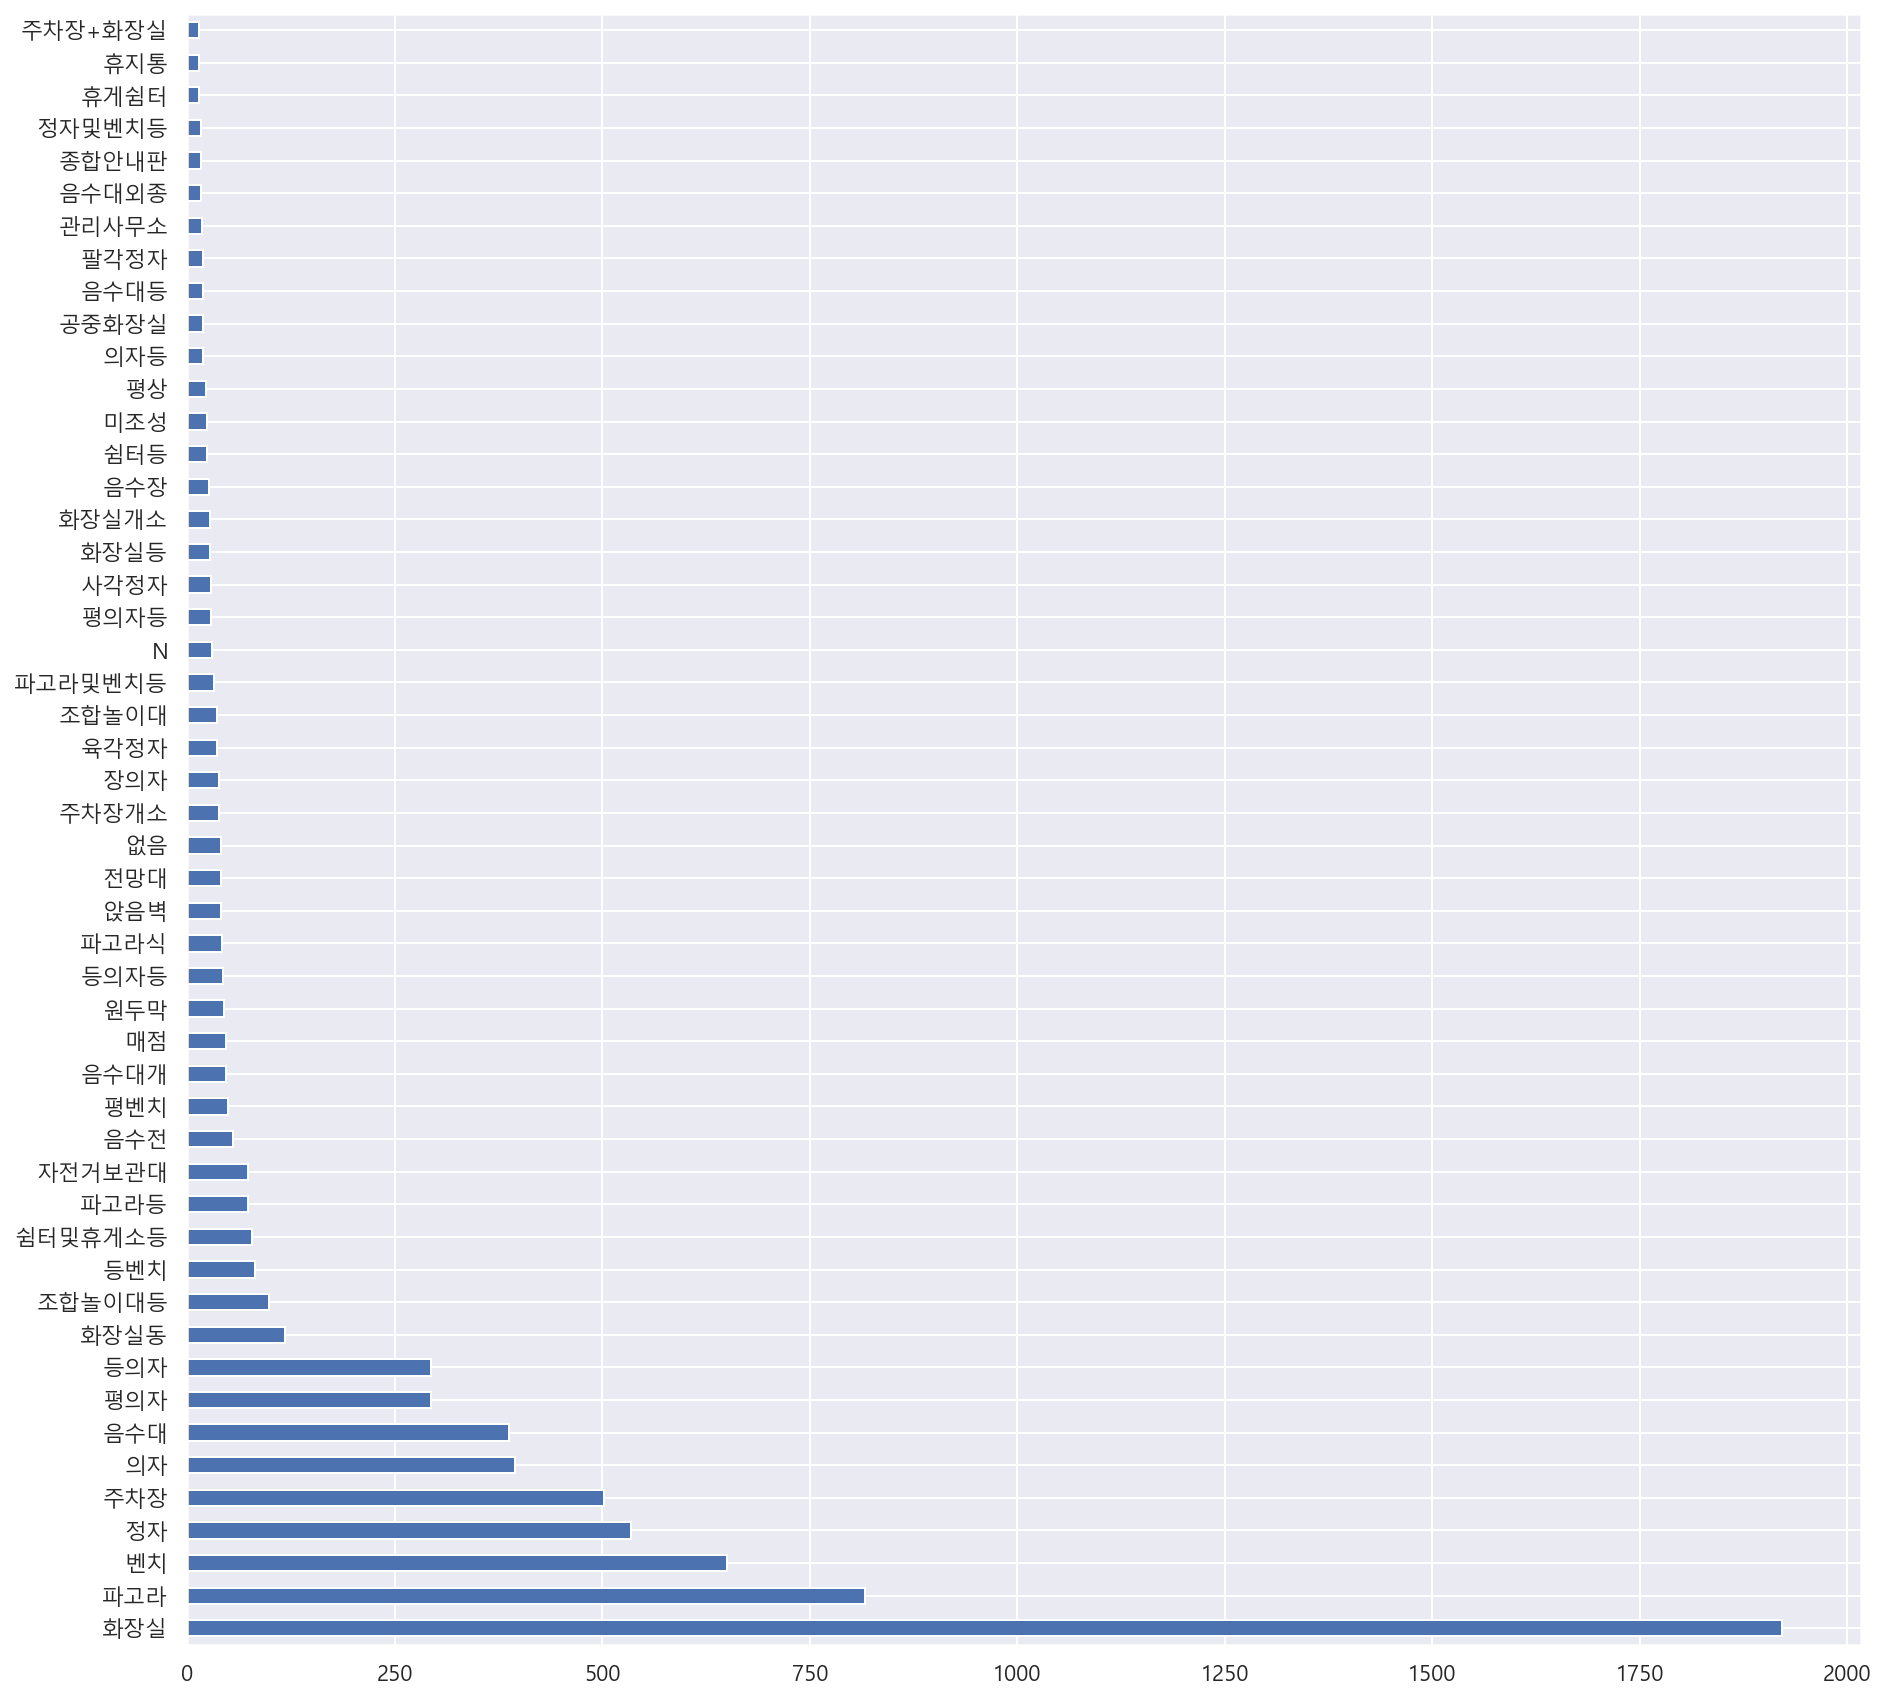

In [56]:
# 상위 50개 단어에 대해 막대그래프를 그려보자

fac_count.head(50).plot.barh(figsize=(15, 15))

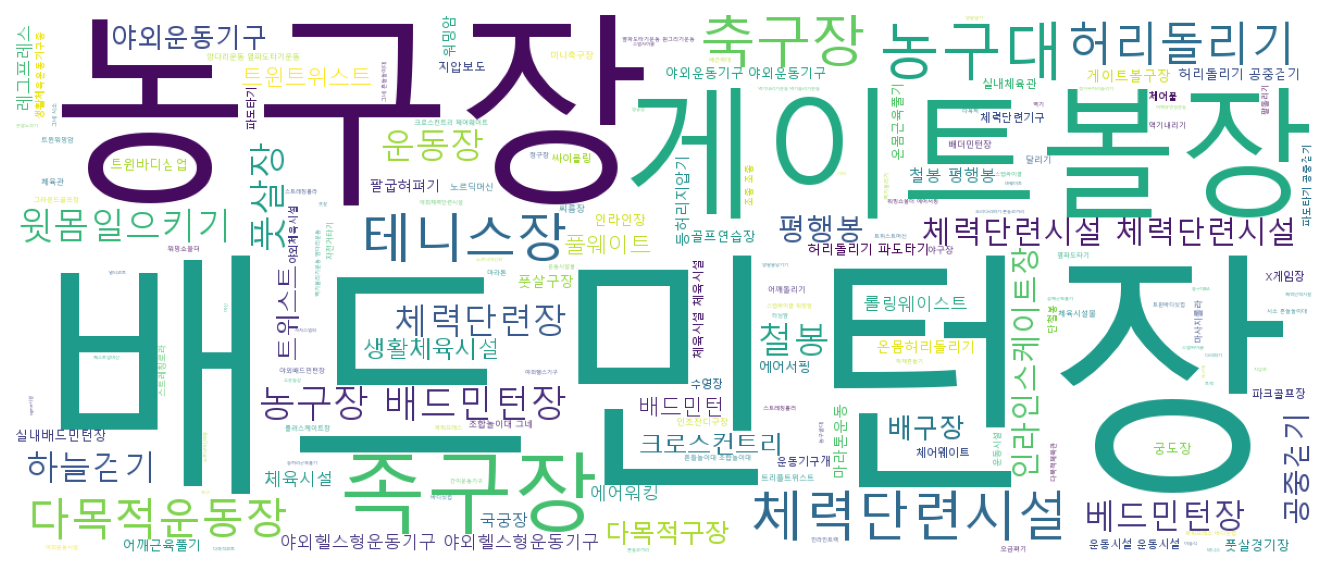

In [57]:
wordcloud(fac)

### 2.6.6 키워드 별 빈도수 구하기
    * 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
    * "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
    * 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
    * 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
    * 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [58]:
# "공원보유시설(편의시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져온다
# df_fac 이라는 변수에 담아준다

facilities = ["화장실", "주차장", "음수대", "파고라", "정자",
              "벤치", "의자", "놀이터", "축구장", "야영장", "CCTV"]

df_fac = df[df["공원보유시설(편익시설)"].notnull()]

In [59]:
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만들어준다
# 해당 단어가 들어가면 true, 아니면 False로 값이 표현되도록 해준다

for f in facilities:
    df[f] = df_fac["공원보유시설(편익시설)"].str.contains(f)
    print(f)

화장실
주차장
음수대
파고라
정자
벤치
의자
놀이터
축구장
야영장
CCTV


In [60]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0,화장실,True,False,False,False,False,False,False,False,False,False,False


In [61]:
# facilities 리스트로 만든 각 컬럼의 빈도수를 구해준다.
df[facilities].sum()

화장실     2208.0
주차장      611.0
음수대      493.0
파고라     1032.0
정자       648.0
벤치       850.0
의자       949.0
놀이터       21.0
축구장        6.0
야영장        3.0
CCTV       6.0
dtype: float64

# 2.7 특정 정보 마스킹

### 2.7.1 전화번호 마스킹

In [62]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다. 
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.

re.sub("(\d{3})-(\d{4})-(\d{4})", r"\1-****-\3", "010-8503-1575")
re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})", r"\1-**\3-**\5", "010-8503-1575")

'010-**03-**75'

In [63]:
# 국가 번호가 들어갈 때 확인하기 "+82-10-1234-5678"
# - 가 들어가거나 여러 예외사항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "+82-10-1234-5678")

'+82-10-1234-5678'

In [64]:
# 함수를 통해 가운데 들어오는 번호를 마스킹 하도록 처리
# 국제번호 등 다양한 형식의 번호가 들어왔을 때 
# - 를 기준으로 뒤에서 두 번째 항목을 마스킹 처리 하되, 
# 마지막 자리는 앞 두자리만 마스킹 합니다.
# 함수명은 mask_phone_number 로 합니다.

phone = "+82-10-1234-5678"

def mask_phone_number(phone):
    
    if pd.isnull(phone):
        return phone
    
    num = phone.split("-")
    num_len = len(num) // 2
    
    num[num_len] = re.sub("\w", "*", num[num_len])
    num[-1] = re.sub("(\d{2})(\d{2})", r"**\2", num[-1])
    
    return "-".join(num)

mask_phone_number(phone)

'+82-10-****-**78'

In [65]:
# 결측치가 들어갔을 때 오류가 날 수 있기 때문에 결측치를 체크합니다.

mask_phone_number(np.nan)

nan

In [66]:
# 위에서 만든 함수를 map을 통해 적용합니다.

df["전화번호(전처리)"] = df["전화번호"].map(mask_phone_number)
df[["공원명", "전화번호", "전화번호(전처리)"]].sample(10)

,공원명,전화번호,전화번호(전처리)
13754,한울공원,043-539-3587,043-***-**87
3095,무장들공원,031-729-8091,031-***-**91
1100,누 원,NaN,NaN
5040,차오름,031-310-3863,031-***-**63
8703,초원,061-270-3625,061-***-**25
8844,소망,062-360-7512,062-***-**12
18099,어린이공원16호,041-630-1268,041-***-**68
17700,근린공원/3,043-850-5831,043-***-**31
6666,1-61호공원,064-728-3601,064-***-**01
6935,진정산공원,051-220-4524,051-***-**24


### 2.7.2 이메일 주소 마스킹

In [67]:
# 이메일 주소의 형식만 남기고 모두 마스크처리

email = "odh0112@naver.com"

# ^ 표시는 not 처리
re.sub("[^@.]", "x", email)

'xxxxxxx@xxxxx.xxx'

In [68]:
# 이메일 주소 아이디의 일부만 마스크처리
# 이 때 맨 앞과 맨 뒤 문자는 그대로 놔두고 나머지 문자에 대해 마스크 처리를 해준다.

email = "odh0112@naver.com"

address, domain = email.split("@")
mask = re.sub("\w", "*", address[2:-1])
print(f"{address[0]}{mask}{address[-1]}@{domain}")
#email.split("@")

o****2@naver.com


In [69]:
# 위에서 작성한 예제를 함수로 만들어보자
def mask_email(email):
    address, domain = email.split("@")
    mask = re.sub("\w", "*", address[2:-1])
    return f"{address[0]}{mask}{address[-1]}@{domain}"

In [70]:
mask_email("odh0112@naver.com")

'o****2@naver.com'

### 2.7.3 자동차 등록번호 마스킹

In [71]:
# 자동차 등록번호를 마스킹 합니다. 
# r'*\2\3**\5' 여기에서 \1 에 해당되는 한글 앞의 숫자는 
# 몇 자리가 들어가든 한글 바로 앞의 마지막 한자리만 봅니다.
# 따라서 앞에 있는 숫자는 마지막 번호만 마스킹 하게 됩니다.

car_num = "32가1234"
re.sub("([0-9])([가-힣])([\d]{4})", r"*\2****", car_num)
re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])", r"*\2\3\4\5", car_num)
re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])", r"*\2\3**\5", car_num)

'3*가1**4'

In [72]:
# 자동차 등록번호를 마스킹 해준다
car_num = "안녕하세요. 자동차 등록번호는 132가1234 입니다."

re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])", r"*\2\3**\5", car_num)

'안녕하세요. 자동차 등록번호는 13*가1**4 입니다.'

# 3 데이터 요약하기

### 3.1 수치형, 범주형 변수 구분하기

In [73]:
# data_types 변수에 데이터 타입만 따로 모으기

data_types = df.dtypes

### 3.2 수치형 변수 요약

In [74]:
# 수치형 변수 구하기
# var_numbers 변수에 담아준다


var_numbers = data_types[data_types != "object"]
var_numbers = var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

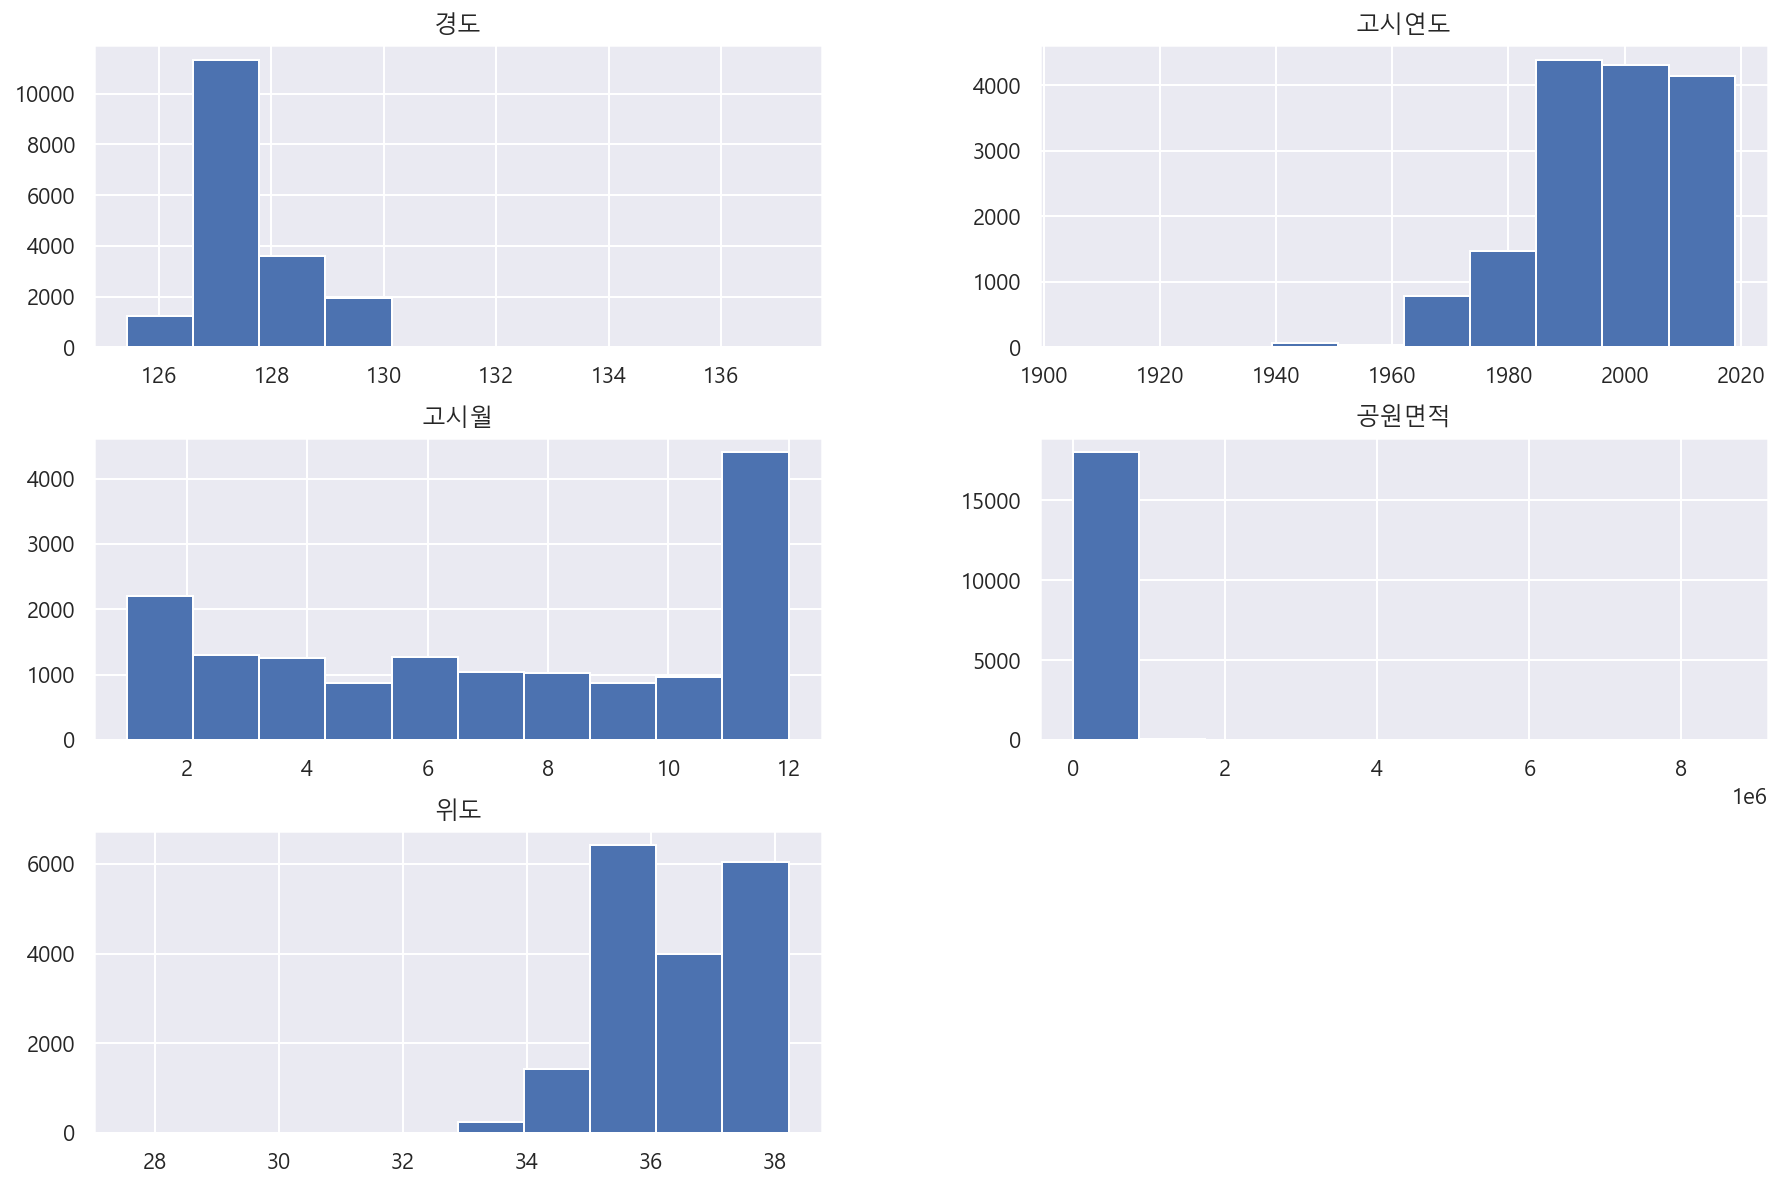

In [75]:
# 히스토그램을 그리면 수치형 변수에 대한 빈도수 분포를 확인 할 수 있음
# 빈독수 분포 => 도수 분포표를 시각화

h = df.hist(figsize=(15,10))

In [76]:
# describe 를 통해 요약
df.describe()
df.describe(include = "object")

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV,전화번호(전처리)
count,18137,18137,18137,18137,17158,4845,6964,5084,1160,3116,17383,16957,18137,18137,18137,18137,18137,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,16957
unique,14710,12423,10,15186,14419,1485,1237,1102,378,993,279,497,112,219,219,17,232,730,2,2,2,2,2,2,2,2,2,2,2,395
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,전라남도 무안군 삼향읍 남악리 미지정 간척지,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,055-212-4501,2019-09-24,5670000,경상남도 창원시,경기도,창원시,화장실,False,False,False,False,False,False,False,False,False,False,False,055-***-**01
freq,124,145,9987,18,18,360,1526,1037,250,141,1176,344,1344,1176,1176,3318,1176,1086,2876,4473,4591,4052,4436,4234,4135,5063,5078,5081,5078,696


### 3.3 범주형 변수 요약

In [77]:
# 범주형 변수 구하기
# var_objects 라는 변수에 저장

var_objects = data_types[data_types == "object"]
var_objects = var_objects.index.tolist()
var_objects[-5:]

['놀이터', '축구장', '야영장', 'CCTV', '전화번호(전처리)']

In [78]:
# 문자열 타입의 데이터 describe 로 요약하기

df[var_objects].describe()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV,전화번호(전처리)
count,18137,18137,18137,18137,17158,4845,6964,5084,1160,3116,17383,16957,18137,18137,18137,18137,18137,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,16957
unique,14710,12423,10,15186,14419,1485,1237,1102,378,993,279,497,112,219,219,17,232,730,2,2,2,2,2,2,2,2,2,2,2,395
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,전라남도 무안군 삼향읍 남악리 미지정 간척지,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,055-212-4501,2019-09-24,5670000,경상남도 창원시,경기도,창원시,화장실,False,False,False,False,False,False,False,False,False,False,False,055-***-**01
freq,124,145,9987,18,18,360,1526,1037,250,141,1176,344,1344,1176,1176,3318,1176,1086,2876,4473,4591,4052,4436,4234,4135,5063,5078,5081,5078,696


### 3.4 crosstab

In [79]:
# 관리기관과 공원구분에 따른 빈도수를 구합니다.
# 결과가 많기 때문에 "체육공원"을 5개 이상 관리하는 기관명만 따로 뽑습니다.
# 숫자의 많고 적음 표시를 위해 style.background_gradient() 를 사용합니다.
# 결과를 manage_category 변수에 담습니다.

manage_category = pd.crosstab(index =df["관리기관명"], columns=df["공원구분"])
manage_category[manage_category["체육공원"]>5]
manage_category[manage_category["체육공원"]>5].style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
관리기관명,,,,,,,,,,
경기도 김포시 체육과,0,0,0,0,0,0,0,0,0,7
경기도 남양주시청,33,0,0,2,5,25,4,68,4,6
경기도 시흥시청,37,0,1,0,7,6,3,72,0,6
경상남도 창원시청,224,0,0,8,8,100,0,816,0,20
대전광역시 대덕구청,11,1,0,0,3,8,0,50,1,6
성남시 공원과,50,0,0,1,0,0,0,0,2,6
전라남도 장성군청,14,0,0,0,4,118,2,10,2,6


In [80]:
# "시도" 별 "공원구분"의 수를 구해보자

city_category = pd.crosstab(index=df["시도"], columns=df["공원구분"])
city_category.style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
시도,,,,,,,,,,
강원도,141,0,2,1,8,85,10,391,4,6
경기도,806,17,1,8,91,406,61,1821,34,73
경상남도,390,0,3,8,25,178,17,1161,12,31
경상북도,178,3,0,0,18,100,26,575,11,6
광주광역시,97,0,0,0,0,18,5,305,1,3
대구광역시,125,0,0,0,5,57,6,381,2,10
대전광역시,99,1,0,1,12,47,12,315,1,9
부산광역시,144,16,1,2,14,96,9,365,3,3
서울특별시,332,70,4,1,19,183,4,1117,11,4


# 4 시도별 공원 분포

### 4.1 시도별 공원 비율

In [81]:
# 시도별로 합계 데이터를 출력

city_count = df["시도"].value_counts().to_frame()
city_mean = df["시도"].value_counts(normalize=True).to_frame()
city_count.head()

,시도
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1745
충청남도,1723


In [82]:
# 합계와 비율을 함께 구하자
# city 라는 변수에 담아준다

city = city_count.merge(city_mean, left_index=True, right_index=True)
city.columns = ["합계", "비율"]
city.style.background_gradient()

,합계,비율
경기도,3318,0.182941
전라남도,1882,0.103766
경상남도,1825,0.100623
서울특별시,1745,0.096212
충청남도,1723,0.094999
전라북도,1137,0.062690
경상북도,917,0.050560
충청북도,899,0.049567
울산광역시,887,0.048906
인천광역시,675,0.037217


### 4.2 공원구분별 분포

<AxesSubplot:xlabel='경도', ylabel='위도'>

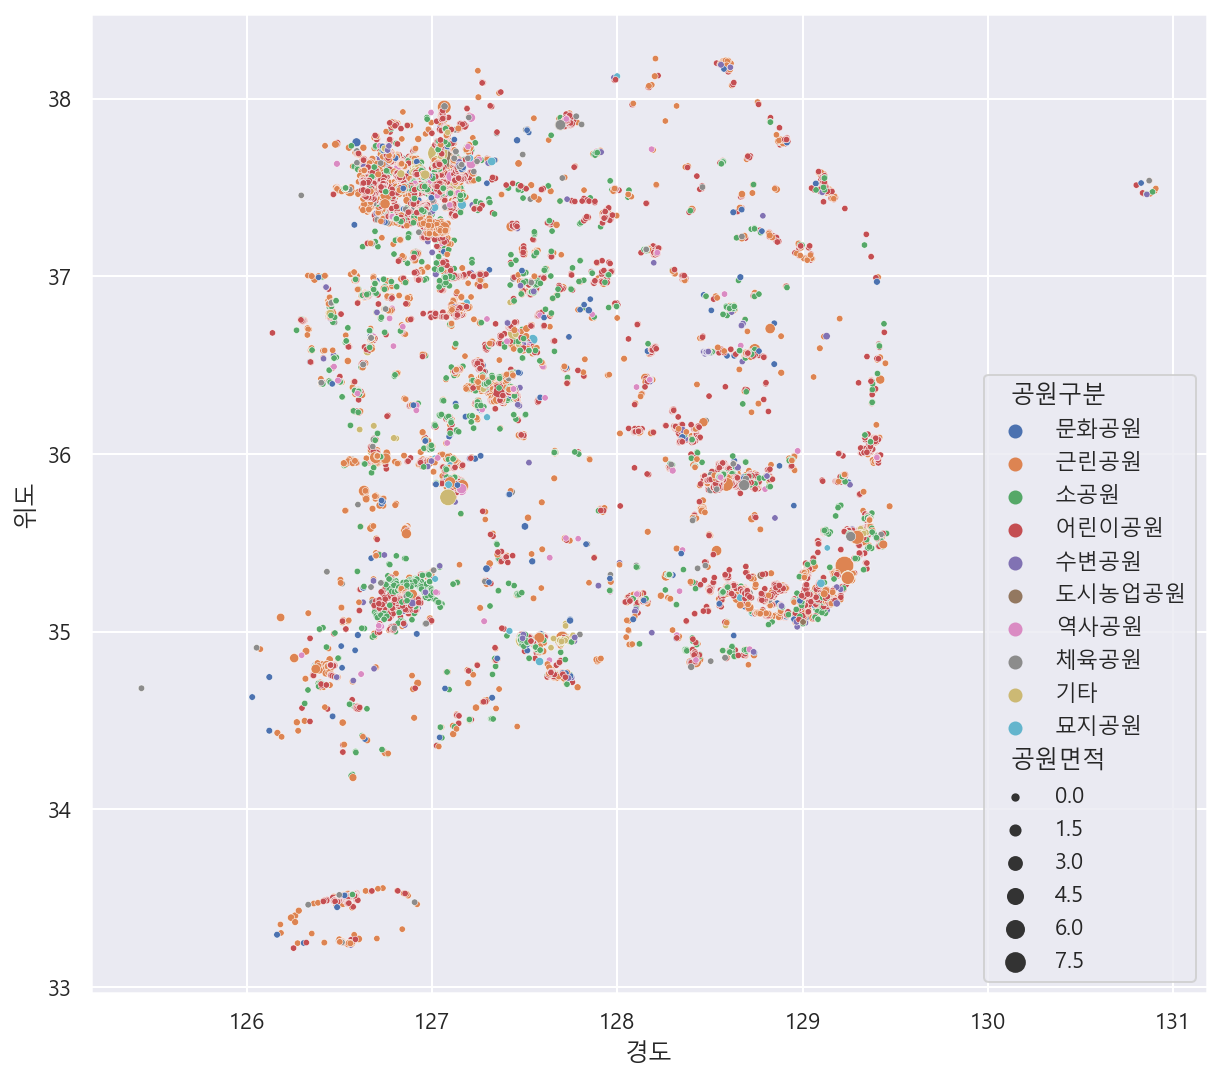

In [83]:
# "공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그립니다.
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
# df에는 전체 데이터 프레임이 df_park 에는 위경도의 이상치를 제거한 데이터가 들어있습니다.

plt.figure(figsize=(10, 9))
sns.scatterplot(data=df_park, x="경도", y="위도", hue ="공원구분", size="공원면적", sizes=(10, 100))

### 4.3 시도별 공원 분포

<AxesSubplot:xlabel='경도', ylabel='위도'>

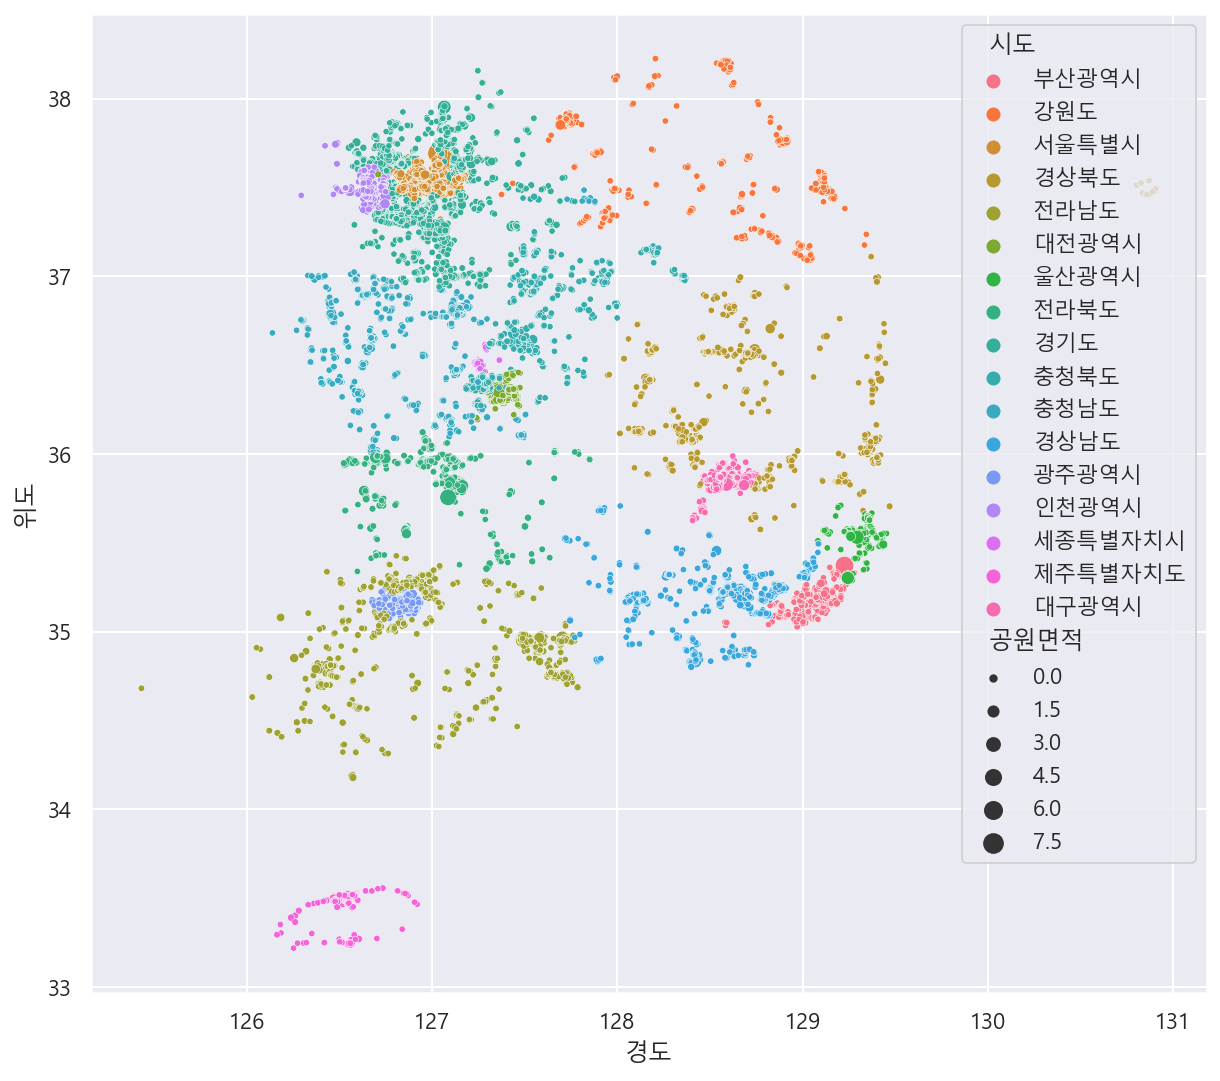

In [84]:
plt.figure(figsize=(10, 9))
sns.scatterplot(data=df_park, x="경도", y="위도", hue ="시도", size="공원면적", sizes=(10, 100))

<AxesSubplot:xlabel='count', ylabel='시도'>

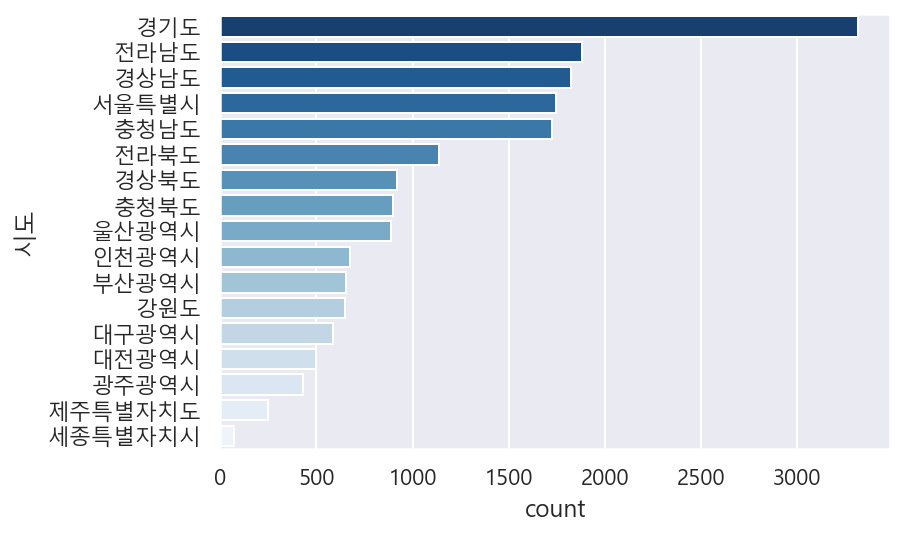

In [85]:
# countplot 으로 시도별 빈도수

sns.countplot(data=df, y ="시도", order=city_count.index, palette="Blues_r") # Blues(Blues_r 과 차이) 하면 적읅수록 색이 진해짐

### 4.4 특정 공원구분 가져오기

In [86]:
# "공원구분"별로 빈도수를 구합니다.

df["공원구분"].value_counts()

어린이공원     9987
근린공원      4170
소공원       2647
문화공원       322
수변공원       301
기타         260
체육공원       230
역사공원       164
묘지공원        43
도시농업공원      13
Name: 공원구분, dtype: int64

In [87]:
# str.match를 통해 특정 텍스트가 들어가는 공원만 가져오기
# ".*"는 앞뒤로 어떤 문자가 등장하든 상관없다는 의미입니다.
# 따라서 아래의 정규표현식 대신 r'(역사|체육|수변|문화)공원'를 사용해도 똑같이 동작합니다.

park_type = r'.*((역사|체육|수변|문화)공원).*'
park = df[df["공원구분"].str.match(park_type)]
park.shape

(1017, 36)

In [88]:
# 위에서 정의한 var_numbers 라는 변수를 가져옵니다.
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

In [89]:
# 리스트 다루기 - var_pair 라는 변수에 리스트를 만들어서 값을 추가하고 삭제해 봅니다.
# 기존 리스트에 "공원구분" 원소 추가하기 "공원구분"에 따라 색상을 다르게 표현해 보기 위함
# var_pair 라는 변수에 담습니다. 
var_pair = var_numbers
var_pair.append("공원구분")
var_pair

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월', '공원구분']

In [90]:
# 기존 리스트의 원소를 제거하기 - '지정고시일', '고시연도', '고시월'
# 제거 한 후 다시 제거하려고 하면 다음과 같은 오류가 발생할 수 있습니다.
# ValueError: list.remove(x): x not in list
var_pair.remove("지정고시일")
var_pair.remove("고시연도")
var_pair.remove("고시월")
var_pair

['위도', '경도', '공원면적', '공원구분']

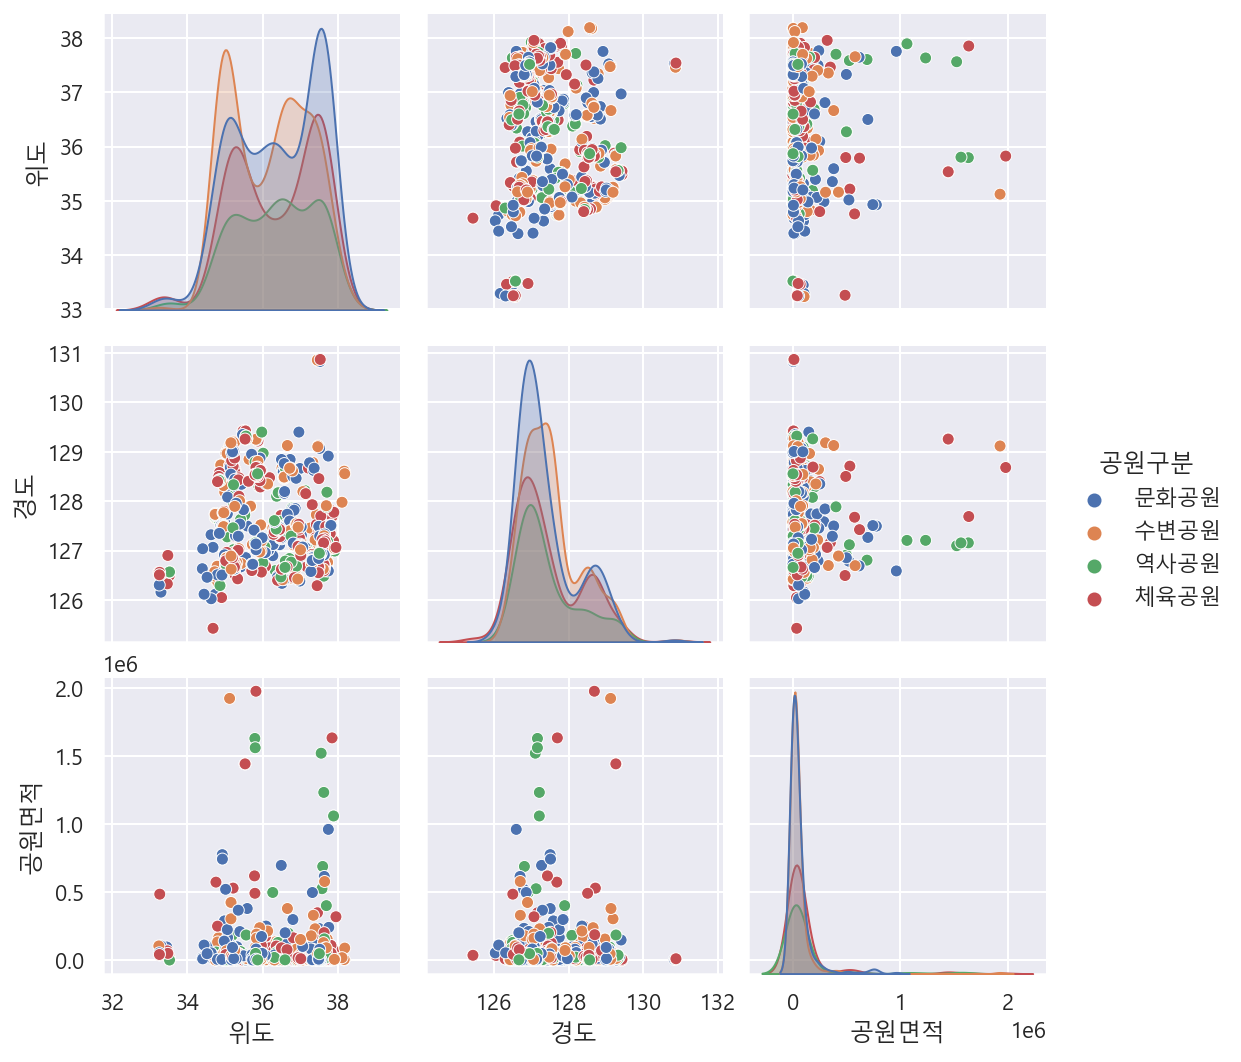

In [91]:
# 위에서 가져온 var_pair 라는 변수에 담긴 리스트에 있는 컬럼을 사용해 pairplot을 그립니다.

sns.pairplot(park[var_pair], hue = "공원구분")

### 4.5 피봇테이블로 시도별 공원수와 평균면적 구하기

In [92]:
# 시도별 공원수와 "공원면적" 컬럼의 평균값, 중앙값을 구합니다.
# style.background_gradient()를 사용해서 값의 많고 적음에 따라 다른 색상으로 표현되도록 합니다.

park_size = pd.pivot_table(df, index ="시도", values="공원면적", aggfunc=["count", "mean", "median"])
park_size.style.background_gradient()

,count,mean,median
,공원면적,공원면적,공원면적
시도,,,
강원도,648,29539.004630,1886.500000
경기도,3318,27628.744093,2527.900000
경상남도,1825,51390.226795,2163.000000
경상북도,917,29771.096947,2146.000000
광주광역시,429,20571.033333,2192.000000
대구광역시,586,28622.956143,2044.150000
대전광역시,497,36507.091952,2069.100000
부산광역시,653,54162.930521,2158.000000


### 4.6 내가 사는 지역의 공원을 지도에 표시해 보기

In [93]:
# 경기도 성남시에 위치한 공원만 출력해 봅니다.
# df_sn 이라는 변수에 담아서 재사용 합니다.

df_sn = df[(df["시도"]=="경기도") & (df["구군"] == "성남시")]
df_sn.shape

(194, 36)

In [94]:
# "시도", "구군", "공원명" 컬럼만 미리보기 합니다.

df_sn[["시도", "구군", "공원명"]].head()

,시도,구군,공원명
2990,경기도,성남시,삼평공원
2991,경기도,성남시,양지공원
2992,경기도,성남시,단대공원
2993,경기도,성남시,영장공원
2994,경기도,성남시,희망대공원


### 4.6.1 특정 공원 정보 찾아보기

In [95]:
# str.contains 로 "공원명"에 "화랑"이 들어가는 데이터를 찾습니다.

df_sn.loc[df_sn["공원명"].str.contains("화랑"), ["공원명", "위도", "경도"]]

,공원명,위도,경도
3077,판교제8호(화랑)공원,37.397084,127.106226


In [96]:
# cols 컬럼에 특정 컬럼만 불러와서 봅니다.
# '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)' 

cols = "공원보유시설(운동시설)	공원보유시설(유희시설)	공원보유시설(편익시설)	공원보유시설(교양시설)"
cols = cols.split("\t")

df_sn.loc[df_sn["공원명"].str.contains("화랑"), cols]

,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설)
3077,"체력단련장, 배드민턴장",NaN,음수전,"생태학습원, 야외음악당"


### 4.6.2 지도에 표현하기

In [97]:
import folium

m = folium.Map([37.397084, 127.106226], zoom_start=13)

for n in df_sn.index:
    lat = df_sn.loc[n, "위도"]
    long = df_sn.loc[n, "경도"]
    tooltip = df_sn.loc[n, "공원명"] + df_sn.loc[n, "소재지도로명주소"]
    folium.Marker([lat, long], tooltip=tooltip).add_to(m)
    
m.save('sn_park.html')
m